# Single Neuron Linear Regression

In this notebook, we'll implement the single neuron linear regression model and use it to find a relationship between chirps per second for crickets and temperature (in °F) in the  [Cricket Chirp vs Temperature Dataset](https://www.kaggle.com/datasets/hershyandrew/cricket-chirp-vs-temperature/ "Title"). We start by importing necessary libraries and plotting a subset of instances from the mentioned dataset:

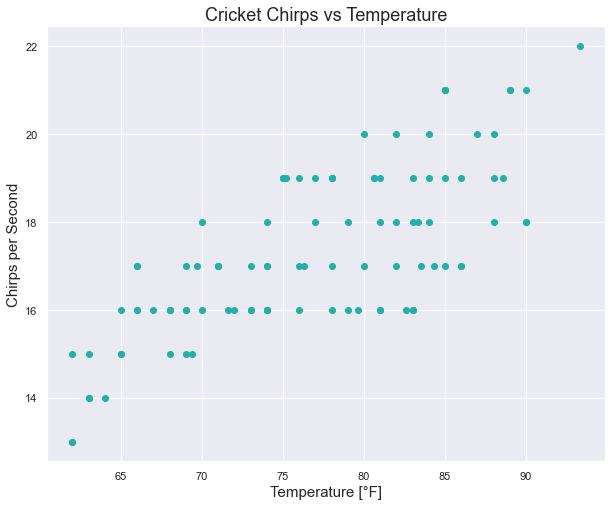

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme() # setting our theme (for future plots)

df = pd.read_csv("Cricket_chirps.csv") # importing the data
df = df.rename(columns = {"X": "temperature", "Y": "chirps_per_second"}) # creating a new dataframe with renamed columns
df = df.iloc[:100][["temperature", "chirps_per_second"]] # extracting the first 100 rows of the dataframe

# plotting chirps per second vs temperature
plt.figure(figsize = (10, 8))
plt.scatter(df.temperature, 
            df.chirps_per_second, 
            color = "lightseagreen")
plt.xlabel("Temperature [°F]", fontsize = 15)
plt.ylabel("Chirps per Second", fontsize = 15)
plt.title("Cricket Chirps vs Temperature", fontsize = 18)
plt.show()

Looking at the above plot, we see a positive linear correlation between chirps per second and temperature. And since our target value (chirps per second) is real-valued, linear regression is a sensible model to use in order to find a linear function to fit this data. We'll build this model by first starting with a SingleNeuron class:

In [2]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function for this single neuron model.

    w_ : numpy.ndarray
        The weights and bias of the single neuron, with the last 
        entry of this array being the bias term. This attribute 
        is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a prediction y_hat on each feature vector. 
    """
    
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = [] # initializing errors_ attribute
        N = X.shape[0] # number of instances

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi # gradient descent update for the weights
                self.w_[-1] -= alpha*(self.predict(xi) - target) # gradient descent update for the bias term
                errors += .5*((self.predict(xi) - target)**2) # adding mean squared error amount to the errors variable
            self.errors_.append(errors/N) # appending the value of the mean squared error cost function for a given epoch
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1] # preactivation value (input to the neuron)
        return self.activation_function(preactivation) # computing the activation value of an input

We now create a feature vector $X$ that contains temperature measurements and a corresponding target vector $y$ that contains measurements of chirps per second:

In [10]:
X = df.temperature.values # feature vector
X = X.reshape(-1, 1) # resizing our feature vector X into a column vector
y = df.chirps_per_second.values # target vector y

We plot these $(X, y)$ pairs below and verify that we have the same plot as above:

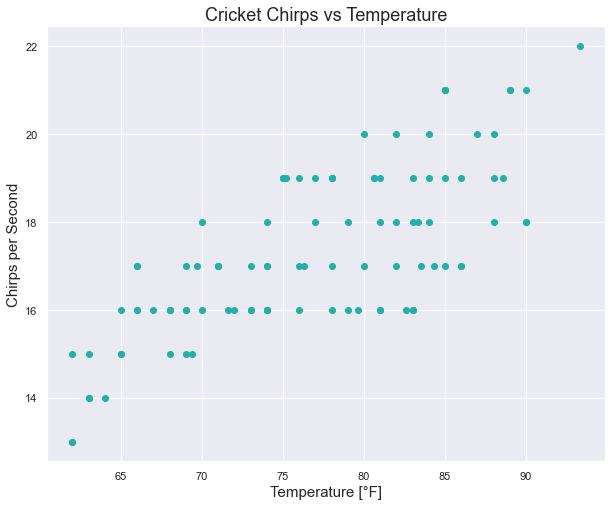

In [11]:
# plotting chirps per second vs temperature
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.xlabel("Temperature [°F]", fontsize = 15)
plt.ylabel("Chirps per Second", fontsize = 15)
plt.title("Cricket Chirps vs Temperature", fontsize = 18)
plt.show()

The two plots above are indeed the same; that's great! But now we'd actually like to perform some machine learning. We do so in the following cell, where we instantiate a SingleNeuron object "node" and train it on the data from the feature vector $X$ and the target vector $y$ defined above:

In [13]:
# linear activation function
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation) # creating a SingleNeuron object called "node"
node.train(X, y, alpha = 0.0001, epochs = 10) # training the node with a learning rate of alpha = 0.0001 over 10 epochs

Now the node has been properly trained. We proceed by plotting the previously-seen data points with a superimposed approximation of the target function generated by our model:

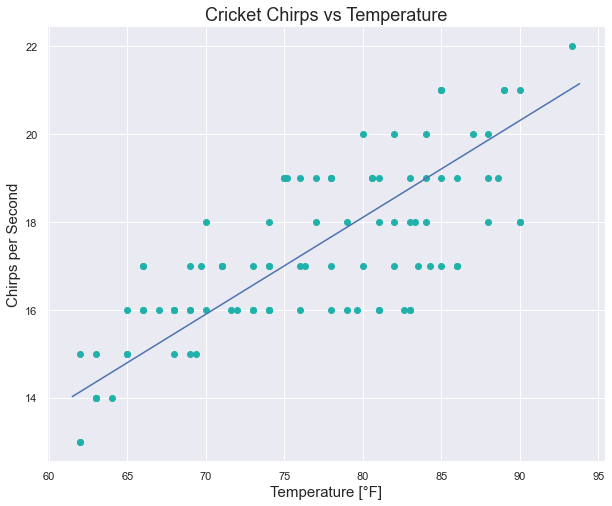

In [14]:
# plotting the data with the best-fit line overlaid onto it
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Crickets")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Temperature [°F]", fontsize = 15)
plt.ylabel("Chirps per Second", fontsize = 15)
plt.title("Cricket Chirps vs Temperature", fontsize = 18)
plt.show()

We see in the above plot that the best-fit line does a reasonably good job of fitting the data. We verify this by plotting the mean squared error obtained while training as a function of epoch number:

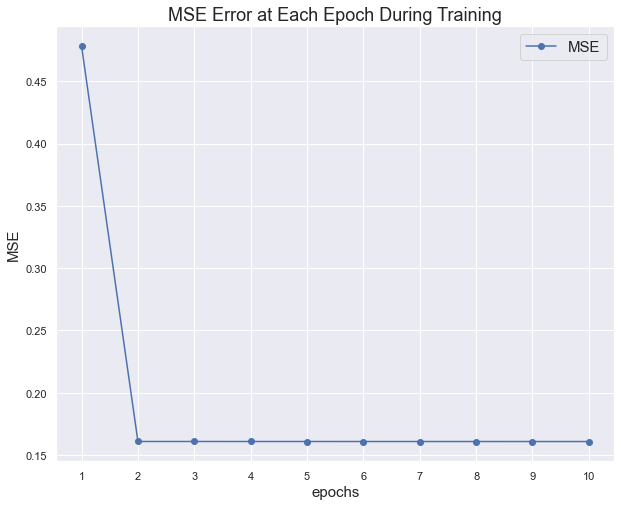

In [15]:
# plotting the mean squared error over training

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

We see that from the first to the second training epoch, the model decreases from a mean squared error of about 0.475 to a mean squared error of abour 0.16, where it stays for the rest of training. This is really good!

Now to finish our analysis of the single neuron linear regression model, we plot lines of best fit that it generates when using different learning rates $\alpha$:

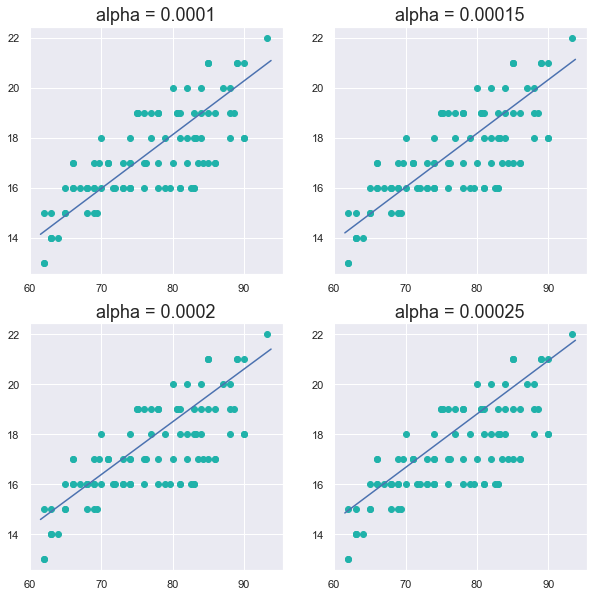

In [16]:
alphas = [0.0001, 0.00015, 0.0002, 0.00025] # different learning rates

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# calling the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# looping over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

This concludes our analysis of the single neuron linear regression model!